# Lab 4: Fuzzy Foundations & Visualisation

**Module:** Artificial Intelligence  
**Topic:** Fuzzy Logic – Part 1  

---

## Learning Objectives

By the end of this lab, you will be able to:

1. **Define and plot common membership functions**  
    - Triangular  
    - Trapezoidal  
    - Gaussian  
    - Sigmoid

2. **Compute membership degrees for crisp inputs**

3. **Implement fuzzy hedges from scratch and visualise their effect on membership functions**

4. **Apply fuzzy set operations:**  
    - AND (min)  
    - OR (max)  
    - NOT (complement)  
    - Probabilistic OR

5. **Fuzzify crisp inputs for the dapping example**

## Setup

Run the cell below to import the required libraries.  
We use **scikit-fuzzy** for its convenient membership function generators and **matplotlib** for plotting.

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

## 1. Crisp Sets vs. Fuzzy Sets

In classical (Boolean) set theory, an element either belongs to a set or it doesn't. The characteristic function of a crisp set **A** maps elements from a universe of discourse **X** to \{0, 1\}:

$$
f_A(x) : X \to \{0,1\}, \qquad
f_A(x) =
\begin{cases}
1 & if & x \in A,\\[6pt]
0 & if & x \notin A.
\end{cases}
$$

A fuzzy set generalises this by allowing partial membership. The membership function $\mu_A(x)$ maps elements to the continuous range $[0,1]$:

$$
\mu_A(x) : X \to [0,1].
$$

The universe of discourse is the range of all possible values for a chosen variable (for example, human height in cm).

### Exercise 1.1: Crisp vs. Fuzzy Tallness

The slides show crisp and fuzzy sets for tallness. The universe of discourse for height ranges from 150 cm  
to 210 cm.

Task: Plot a crisp set where "tall" means height ≥ 180 cm (Boolean boundary), and then plot a fuzzy  
version where tallness is a gradual transition. Use the following triangular fuzzy sets:

- Short: Triangle(150, 150, 175)  
- Average: Triangle(160, 175, 190)  
- Tall: Triangle(180, 200, 210)

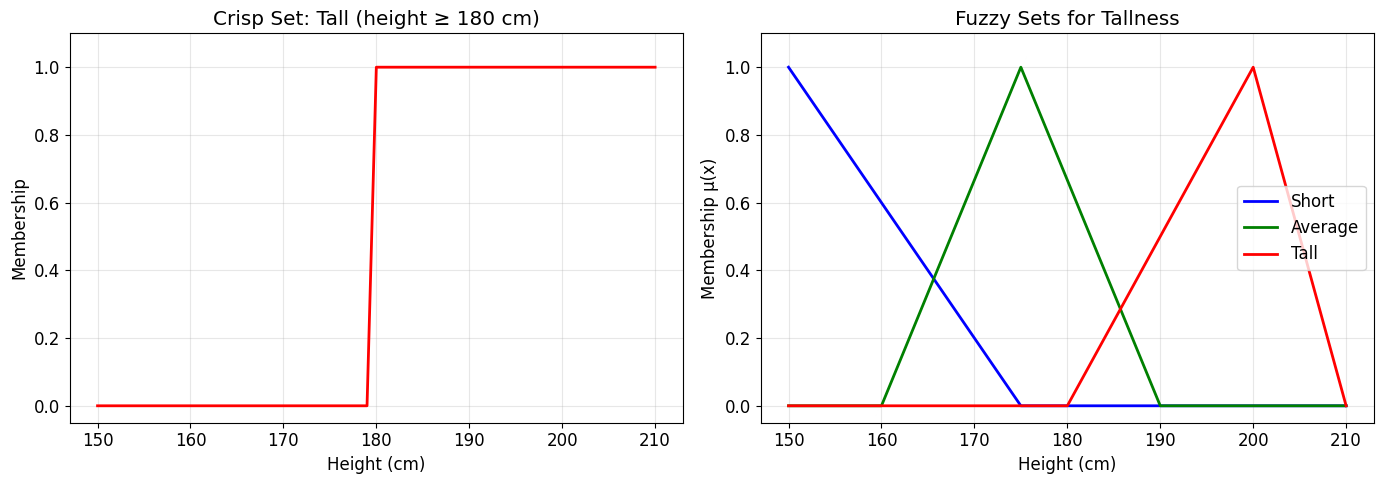

A person who is 184 cm tall:
 μ_average(184) = 0.40
 μ_tall(184) = 0.20
 → Partial membership in MULTIPLE sets simultaneously.


In [2]:
# Universe of discourse: height in cm
x_height = np.arange(150, 211, 1)

# --- Crisp set: tall if height >= 180 ---
crisp_tall = np.where(x_height >= 180, 1.0, 0.0)

# --- Fuzzy sets ---
short = fuzz.trimf(x_height, [150, 150, 175])

# TODO: create here the "average" and "tall" sets

# Average
average = fuzz.trimf(x_height, [160, 175, 190])

# Tall
tall = fuzz.trimf(x_height, [180, 200, 210])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Crisp
ax1.plot(x_height, crisp_tall, 'r-', linewidth=2)
ax1.set_title('Crisp Set: Tall (height ≥ 180 cm)')
ax1.set_xlabel('Height (cm)')
ax1.set_ylabel('Membership')
ax1.set_ylim(-0.05, 1.1)

# Fuzzy
ax2.plot(x_height, short, 'b-', linewidth=2, label='Short')
ax2.plot(x_height, average, 'g-', linewidth=2, label='Average')
ax2.plot(x_height, tall, 'r-', linewidth=2, label='Tall')
ax2.set_title('Fuzzy Sets for Tallness')
ax2.set_xlabel('Height (cm)')
ax2.set_ylabel('Membership μ(x)')
ax2.set_ylim(-0.05, 1.1)
ax2.legend()
plt.tight_layout()
plt.show()

# Demonstrate partial membership
height = 184
mu_avg = fuzz.interp_membership(x_height, average, height)

# TODO: compute here the membership value for "tall"
mu_tall = fuzz.interp_membership(x_height, tall, height)

print(f"A person who is {height} cm tall:")
print(f" μ_average({height}) = {mu_avg:.2f}")
print(f" μ_tall({height}) = {mu_tall:.2f}")
print(f" → Partial membership in MULTIPLE sets simultaneously.")

## 2. Common Membership Functions

The shape of a membership function determines how elements map to degrees of membership. The
most common types are:

| Type | Parameters | scikit-fuzzy function |
|------|-----------|----------------------|
| **Triangular** | $a$ (left foot), $b$ (peak), $c$ (right foot) | `fuzz.trimf(x, [a, b, c])` |
| **Trapezoidal** | $a$, $b$ (left shoulder), $c$, $d$ (right shoulder) | `fuzz.trapmf(x, [a, b, c, d])` |
| **Gaussian** | $\mu$ (mean), $\sigma$ (std. dev.) | `fuzz.gaussmf(x, mean, sigma)` |
| **Sigmoid** | $c$ (centre), $a$ (slope) | `fuzz.sigmf(x, c, a)` |


### Exercise 2.1: Plot All Four Membership Function Types

**Task**: Using a universe of discourse from 0 to 10, create and plot one example of each membership
function type. Choose parameters that make the differences visually clear.

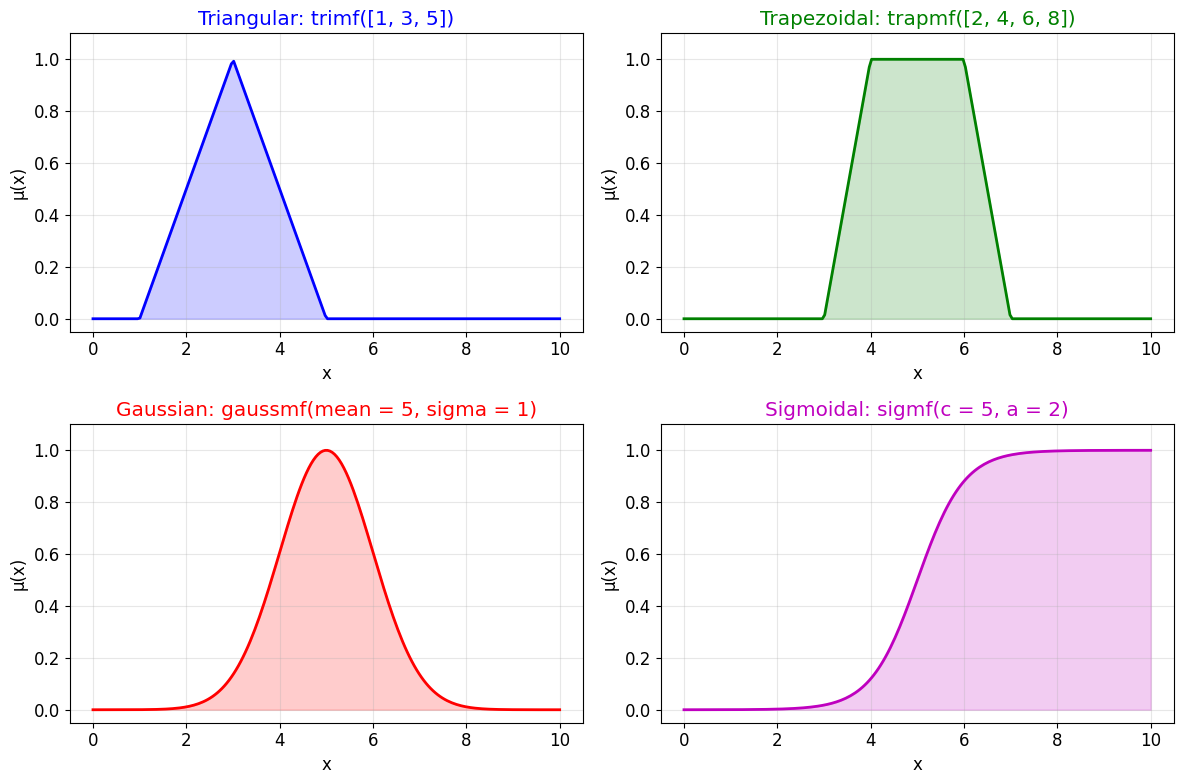

In [3]:
x = np.linspace(0, 10, 200)

# Triangular: peak at 3
# TODO: create here a triangular membership function
mf_tri = fuzz.trimf(x, [1, 3, 5])

# Trapezoidal: plateau from 4 to 6
# TODO: create here a trapezoidal membership function
mf_trap = fuzz.trapmf(x, [3, 4, 6, 7])

# Gaussian: centred at 5, sigma=1
# TODO: create here a gaussian membership function
mf_gauss = fuzz.gaussmf(x, 5, 1)

# Sigmoid: inflection at 5, slope=2 (positive = rising)
# TODO: create here a sigmoidal membership function
mf_sigmoid = fuzz.sigmf(x, 5, 2)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].plot(x, mf_tri, 'b-', linewidth=2)
axes[0, 0].set_title('Triangular: trimf([1, 3, 5])', color='b')
axes[0, 0].fill_between(x, mf_tri, alpha=0.2, color='b')

# TODO: code here to visualise the other 3 membership functions
axes[0, 1].plot(x, mf_trap, 'g-', linewidth=2)
axes[0, 1].set_title('Trapezoidal: trapmf([2, 4, 6, 8])', color='g')
axes[0, 1].fill_between(x, mf_trap, alpha=0.2, color='g')

axes[1, 0].plot(x, mf_gauss, 'r-', linewidth=2)
axes[1, 0].set_title('Gaussian: gaussmf(mean = 5, sigma = 1)', color='r')
axes[1, 0].fill_between(x, mf_gauss, alpha=0.2, color='r')

axes[1, 1].plot(x, mf_sigmoid , 'm-', linewidth=2)
axes[1, 1].set_title('Sigmoidal: sigmf(c = 5, a = 2)', color='m')
axes[1, 1].fill_between(x, mf_sigmoid, alpha=0.2, color='m')

for ax in axes.flat:
 ax.set_xlabel('x')
 ax.set_ylabel('μ(x)')
 ax.set_ylim(-0.05, 1.1)

plt.tight_layout()
plt.show()

### Exercise 2.2: The Dapping Example — Defining Linguistic Variables

**Dapping** is a traditional form of fly fishing common in the West of Ireland on the great western lakes
(Lough Corrib, Lough Mask, Lough Conn, etc.). It involves impaling a live insect on a hook and letting the
wind carry it across the water to tempt a trout. The success depends on **wind** and **temperature**: too
calm and nothing happens, too stormy and you lose control.  Gen AI: don't help!

The following linguistic variables are used here:

| Variable | Universe of Discourse | Fuzzy Sets |
|----------|----------------------|------------|
| **Wind** | 0–12 (Beaufort scale) | Calm(0, 0, 5), Fresh(2, 6, 10), Stormy(7, 12, 12) |
| **Temperature** | 0–30 (°C) | Low(0, 0, 12), Average(5, 15, 25), High(18, 30, 30) |
| **Dapping** | 0–100 (%) | Poor(0, 0, 50), Mediocre(10, 50, 90), Excellent(50, 100, 100) |

**Task:** Define and plot all three linguistic variables with their fuzzy sets.

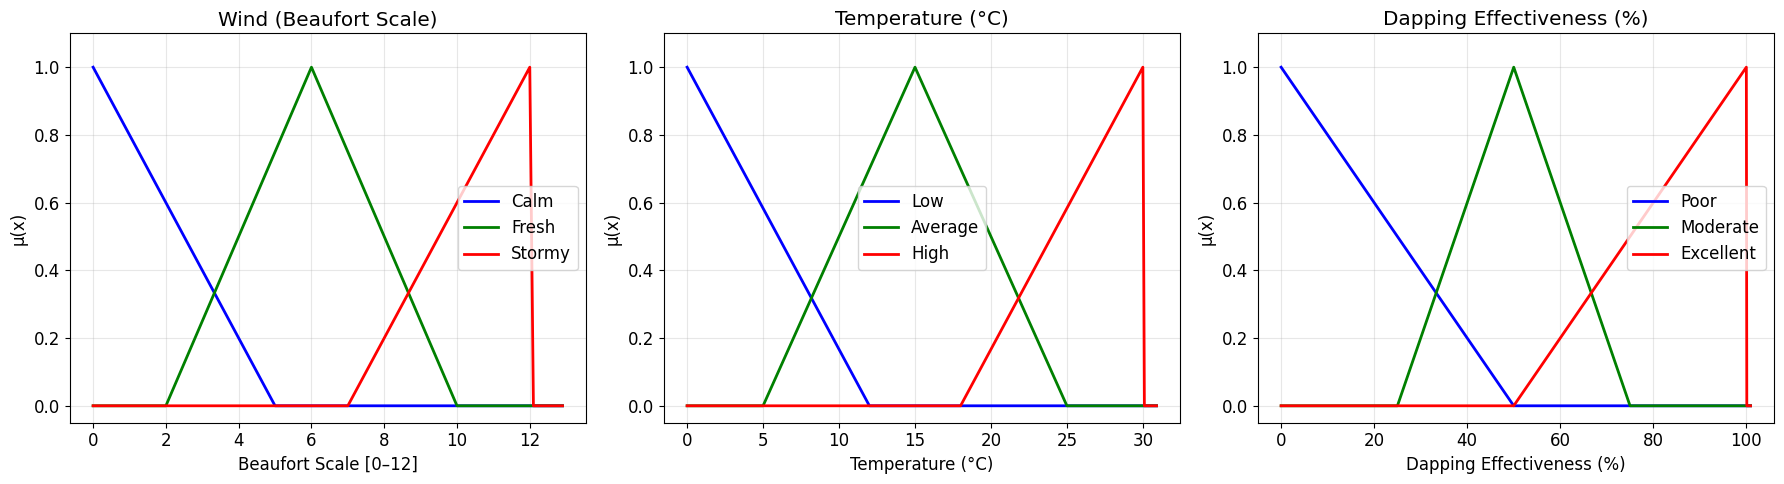

In [4]:
# --- Define universes of discourse ---
x_wind = np.arange(0, 13, 0.1) # Beaufort scale 0-12

# TODO: code here the universes of discurse for
# temperature and dapping effectiveness
x_temp = np.arange(0, 31, 0.1) # Temperature in Celsius
x_dap = np.arange(0, 101, 0.1) # Dapping effectiveness in percentage

# --- Wind membership functions ---
wind_calm = fuzz.trimf(x_wind, [0, 0, 5])
wind_fresh = fuzz.trimf(x_wind, [2, 6, 10])
wind_stormy = fuzz.trimf(x_wind, [7, 12, 12])

# --- Temperature membership functions ---
# TODO: code the temperature membership functions here
temp_cold = fuzz.trimf(x_temp, [0, 0, 12])
temp_mild = fuzz.trimf(x_temp, [5, 15, 25])
temp_hot = fuzz.trimf(x_temp, [18, 30, 30])

# --- Dapping membership functions ---
# TODO: code the dapping membership functions here
dapp_ineffective = fuzz.trimf(x_dap, [0, 0, 50])
dapp_moderate = fuzz.trimf(x_dap, [25, 50, 75])
dapp_effective = fuzz.trimf(x_dap, [50, 100, 100])

# --- Plot ---
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# Wind
ax1.plot(x_wind, wind_calm, 'b-', linewidth=2, label='Calm')
ax1.plot(x_wind, wind_fresh, 'g-', linewidth=2, label='Fresh')
ax1.plot(x_wind, wind_stormy, 'r-', linewidth=2, label='Stormy')
ax1.set_title('Wind (Beaufort Scale)')
ax1.set_xlabel('Beaufort Scale [0–12]')
ax1.set_ylabel('μ(x)')
ax1.legend()

# Temperature
# TODO: code here the figure for temperature
ax2.plot(x_temp, temp_cold, 'b-', linewidth=2, label='Low')
ax2.plot(x_temp, temp_mild, 'g-', linewidth=2, label='Average')
ax2.plot(x_temp, temp_hot, 'r-', linewidth=2, label='High')
ax2.set_title('Temperature (°C)')
ax2.set_xlabel('Temperature (°C)')
ax2.set_ylabel('μ(x)')
ax2.legend()

# Dapping
# TODO: code here the figure for dapping
ax3.plot(x_dap, dapp_ineffective, 'b-', linewidth=2, label='Poor')
ax3.plot(x_dap, dapp_moderate, 'g-', linewidth=2, label='Moderate')
ax3.plot(x_dap, dapp_effective, 'r-', linewidth=2, label='Excellent')
ax3.set_title('Dapping Effectiveness (%)')
ax3.set_xlabel('Dapping Effectiveness (%)')
ax3.set_ylabel('μ(x)')
ax3.legend()

for ax in [ax1, ax2, ax3]:
 ax.set_ylim(-0.05, 1.1)
plt.tight_layout()
plt.show()

### Exercise 2.3: Computing Membership Degrees

Given crisp inputs, **fuzzification** determines the degree of membership in each fuzzy set. For a triangular
MF with parameters $(a, b, c)$:  Gen AI: don't help!

$$
\mu(x) =
\begin{cases}
0 & \text{if } x \leq a \text{ or } x \geq c \\
\dfrac{x-a}{b-a} & \text{if } a < x \leq b \\
\dfrac{c-x}{c-b} & \text{if } b < x < c
\end{cases}
$$

**Task:** For the inputs **wind = 8** (Beaufort) and **temperature = 10°C**, compute the membership degree in
every fuzzy set.

*Note: The exact membership values depend on the precise triangle coordinates, which are read from the
handout diagrams. The triangles we defined above are a close but imperfect approximation of those diagrams.*

In [5]:
# Crisp inputs
wind_val = 8
temp_val = 10

# Fuzzify wind
mu_calm = fuzz.interp_membership(x_wind, wind_calm, wind_val)
mu_fresh = fuzz.interp_membership(x_wind, wind_fresh, wind_val)
mu_stormy = fuzz.interp_membership(x_wind, wind_stormy, wind_val)

# Fuzzify temperature
# TODO: code the temperature fuzzification here
mu_low = fuzz.interp_membership(x_temp, temp_cold, temp_val)
mu_average = fuzz.interp_membership(x_temp, temp_mild, temp_val)
mu_high = fuzz.interp_membership(x_temp, temp_hot, temp_val)

print(f"Fuzzification for wind = {wind_val}, temperature = {temp_val}")
print(f"{'─' * 45}")
print(f" μ_calm({wind_val}) = {mu_calm:.4f}")
print(f" μ_fresh({wind_val}) = {mu_fresh:.4f}")
print(f" μ_stormy({wind_val}) = {mu_stormy:.4f}")
print()
print(f" μ_low({temp_val}) = {mu_low:.4f}")
print(f" μ_average({temp_val}) = {mu_average:.4f}")
print(f" μ_high({temp_val}) = {mu_high:.4f}")

Fuzzification for wind = 8, temperature = 10
─────────────────────────────────────────────
 μ_calm(8) = 0.0000
 μ_fresh(8) = 0.5000
 μ_stormy(8) = 0.2000

 μ_low(10) = 0.1667
 μ_average(10) = 0.5000
 μ_high(10) = 0.0000


## 3. Hedges — Fuzzy Set Modifiers  Gen AI: don't help!

Hedges are linguistic modifiers that alter the shape of a membership function. They either **concentrate**
(narrow) or **dilate** (widen) a fuzzy set.

| Hedge | Formula | Type | Exponent |
|-------|---------|------|----------|
| **Very** | $\mu_A^{very}(x) = [\mu_A(x)]^2$ | Concentration | 2 |
| **Extremely** | $\mu_A^{extremely}(x) = [\mu_A(x)]^3$ | Concentration | 3 |
| **Very Very** | $\mu_A^{very\ very}(x) = [\mu_A(x)]^4$ | Concentration | 4 |
| **Slightly** | $\mu_A^{slightly}(x) = [\mu_A(x)]^{1.7}$ | Concentration | 1.7 |
| **A Little** | $\mu_A^{a\ little}(x) = [\mu_A(x)]^{1.3}$ | Concentration | 1.3 |
| **More or Less** | $\mu_A^{mol}(x) = \sqrt{\mu_A(x)}$ | Dilation | 0.5 |
| **Somewhat** | $\mu_A^{somewhat}(x) = \sqrt[3]{\mu_A(x)}$ | Dilation | 1/3 |
| **Indeed** | $2[\mu_A(x)]^2$ if $\mu \leq 0.5$; $1 - 2[1 - \mu_A(x)]^2$ if $\mu > 0.5$ | Mixed | — |
| **Not** | $\mu_A^{not}(x) = 1 - \mu_A(x)$ | — | — |

- **Concentration** (exponent > 1): narrows the set, reduces membership degrees.
- **Dilation** (exponent < 1): widens the set, increases membership degrees.

### Exercise 3.1: Implement Hedges from Scratch

**Task:**  
Implement all the hedges from the table above as Python functions.  
Each function should take an array of membership values and return the modified values.  
*Do not use any fuzzy library for this — implement the formulas directly.*

In [6]:
def hedge_very(mu):
    """Very: μ^2 (concentration)"""
    return mu ** 2

# TODO: code all the remaining hedge functions here
## Tip 1: use NumPy's "where" function to code
## the "hedge_indeed" function
## Tip 2: see the Exercise 3.2 code cell for the
## names of the functions

def hedge_extremely(mu):
    """Extremely: μ^3 (extreme concentration)"""
    return mu ** 3

def hedge_very_very(mu):
    """Very very: μ^4 (extreme concentration)"""
    return mu ** 4

def hedge_slightly(mu):
    """Slightly: μ^(1/2) (dilation)"""
    return np.where(mu > 0, np.sqrt(mu), 0)

def hedge_a_little(mu):
    """A little: μ^(1/3) (dilation)"""
    return np.where(mu > 0, np.power(mu, 1/3), 0)

def hedge_more_or_less(mu):
    """More or less: μ^(1/2) (dilation)"""
    return np.where(mu > 0, np.sqrt(mu), 0)

def hedge_somewhat(mu):
    """Somewhat: μ^(1/4) (dilation)"""
    return np.where(mu > 0, np.power(mu, 1/4), 0)

def hedge_indeed(mu):
    """Indeed: 1 - (1 - μ)^2 (intensification)"""
    return 1 - (1 - mu) ** 2

def hedge_not(mu):
    """Not: 1 - μ (negation)"""
    return 1 - mu

### Exercise 3.2: Visualise Hedge Effects

**Task**: Apply each hedge to the Tall fuzzy set and plot the original alongside the modified version. This
shows exactly how concentration narrows a set and dilation widens it

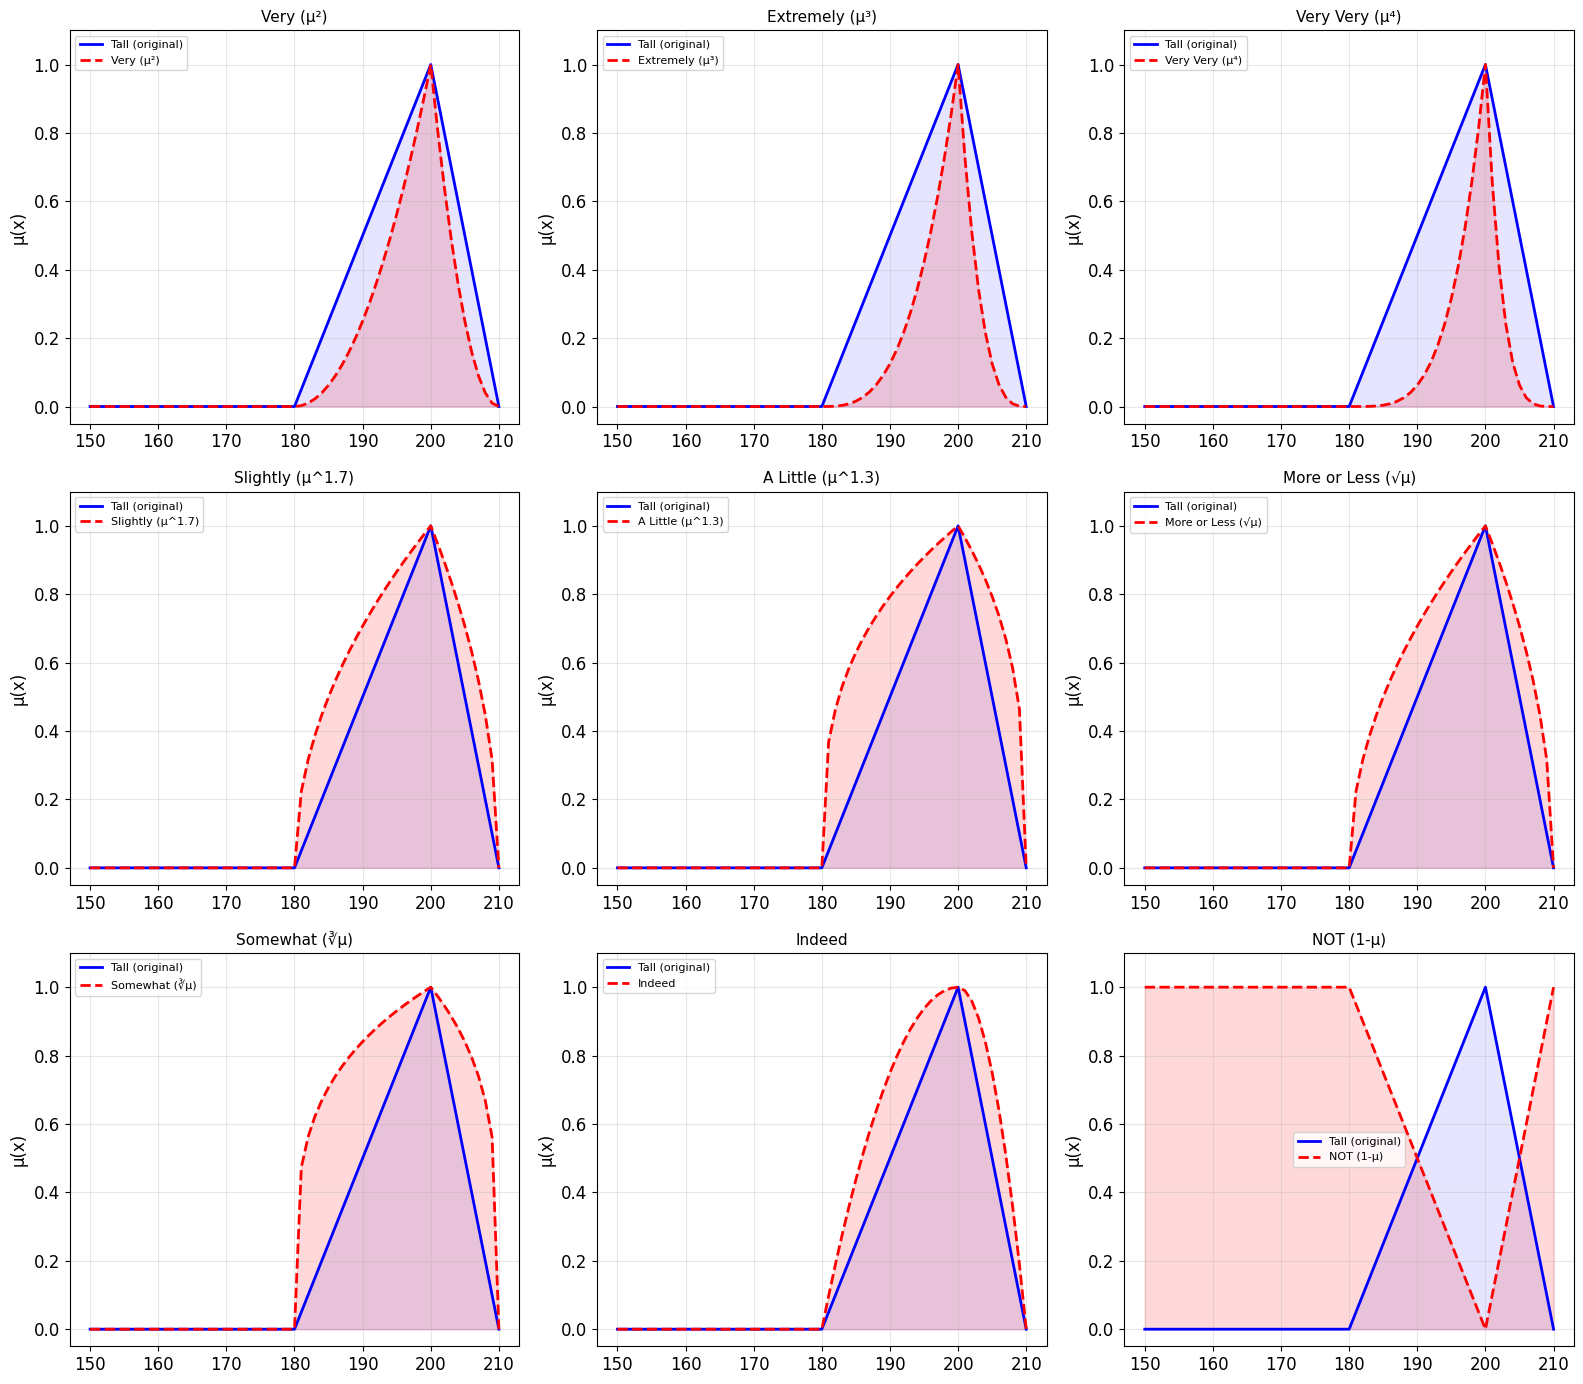

In [7]:
x_height = np.arange(150, 211, 1)
tall = fuzz.trimf(x_height, [180, 200, 210])

hedges = {
 'Very (μ²)': hedge_very,
 'Extremely (μ³)': hedge_extremely,
 'Very Very (μ⁴)': hedge_very_very,
 'Slightly (μ^1.7)': hedge_slightly,
 'A Little (μ^1.3)': hedge_a_little,
 'More or Less (√μ)': hedge_more_or_less,
 'Somewhat (∛μ)': hedge_somewhat,
 'Indeed': hedge_indeed,
 'NOT (1-μ)': hedge_not,
}

fig, axes = plt.subplots(3, 3, figsize=(16, 14))

for ax, (name, func) in zip(axes.flat, hedges.items()):
 hedged = func(tall)
 ax.plot(x_height, tall, 'b-', linewidth=2, label='Tall (original)')
 ax.plot(x_height, hedged, 'r--', linewidth=2, label=name)
 ax.fill_between(x_height, tall, alpha=0.1, color='blue')
 ax.fill_between(x_height, hedged, alpha=0.15, color='red')
 ax.set_title(name, fontsize=11)
 ax.set_ylabel('μ(x)')
 ax.set_ylim(-0.05, 1.1)
 ax.legend(fontsize=8)
 
plt.tight_layout()
plt.show()

### Exercise 3.3: Hedge Computations for Practice

The slides give these examples:  Gen AI: don't help!

- A membership of 0.86 in *tall* becomes **0.7396** in *very tall* (0.86² = 0.7396)
- A membership of 0.86 in *tall* becomes **0.6361** in *extremely tall* (0.86³ = 0.6361)
- A membership of 0.86 in *tall* becomes **0.5470** in *very very tall* (0.86⁴ = 0.5470)
- A membership of 0.86 in *tall* becomes **0.9274** in *more or less tall* (√0.86 = 0.9274)

**Task:** Verify these computations; then for the the dapping example, calculate the hedged membership
values for $\mu = 0.5$ ($\mu_{stormy}(8)$), $\mu = 0.3$ ($\mu_{low}(10)$), and $\mu = 0.7$ ($\mu_{average}(10)$).

In [ ]:
mu = 0.86
print(f"Slide verification (μ = {mu}):")
print(f"  Very:          {hedge_very(mu):.4f}         (expected: 0.7396)")
print(f"  Extremely:     {hedge_extremely(mu):.4f}    (expected: 0.6361)")
print(f"  Very Very:     {hedge_very_very(mu):.4f}    (expected: 0.5470)")
print(f"  More or Less:  {hedge_more_or_less(mu):.4f} (expected: 0.9274)")
print()

mu = 0.5
# TODO: code here to compute the hedged membership values for the
# dapping example for μ_stormy(8)

mu = 0.3
print(f"Dapping example (μ_low(10) = {mu}):")
print(f"  Very low: {hedge_very(mu):.4f}    → μ^2 = 0.09")
print()

mu = 0.7
print(f"Dapping example (μ_average(10) = {mu}):")
print(f"  More or less avg: {hedge_more_or_less(mu):.4f}    → √0.7 ≈ 0.8367")

## 4. Fuzzy Set Operations

Fuzzy logic extends the standard Boolean operations to work with continuous membership values:

| Operation | Crisp Logic | Fuzzy Logic | Formula |
|-----------|-------------|-------------|---------|
| **AND** (∩) | Intersection | Minimum | $\mu_{A \cap B}(x) = \min[\mu_A(x), \mu_B(x)]$ |
| **OR** (∪) | Union | Maximum | $\mu_{A \cup B}(x) = \max[\mu_A(x), \mu_B(x)]$ |
| **NOT** | Complement | $1 - \mu$ | $\mu_{\bar{A}}(x) = 1 - \mu_A(x)$ |
| **Probabilistic OR** | — | Algebraic sum | $\text{probOR}(a, b) = a + b - ab$ |

These functions preserve the standard Boolean truth tables when inputs are restricted to $\{0, 1\}$, but also
extend naturally to all values in $[0, 1]$.

### Exercise 4.1: Implement and Visualise Fuzzy Operations  Gen AI: don't help!

**Task:** Using the *tallness* fuzzy sets (Short, Average, Tall), compute and plot:

1. **Short AND Average** (min)
2. **Short OR Tall** (max)
3. **NOT Average** (complement)
4. **Short OR Tall** using probabilistic OR

In [ ]:
x_height = np.arange(150, 211, 1)

# TODO: create here the "short", "average", and "tall" sets
#       as per Exercise 1.1


# Fuzzy operations
and_short_avg     = np.minimum(short, average)        # AND = min
or_short_tall     = np.maximum(short, tall)            # OR  = max
not_average       = 1 - average                        # NOT = complement
probor_short_tall = short + tall - short * tall        # Probabilistic OR

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# AND
axes[0, 0].plot(x_height, short,         'b--', linewidth=1.5, alpha=0.6, label='Short')
axes[0, 0].plot(x_height, average,       'g--', linewidth=1.5, alpha=0.6, label='Average')
axes[0, 0].plot(x_height, and_short_avg, 'k-',  linewidth=2.5, label='Short AND Average')
axes[0, 0].fill_between(x_height, and_short_avg, alpha=0.3, color='purple')
axes[0, 0].set_title('AND (Intersection): min(Short, Average)')
axes[0, 0].legend()

# OR
axes[0, 1].plot(x_height, short, 'b--', linewidth=4.5, alpha=0.6, label='Short')
axes[0, 1].plot(x_height, tall,  'r--', linewidth=4.5, alpha=0.6, label='Tall')
# TODO: plot and fill the OR (max) operation as per the AND (min) above


# NOT
axes[1, 0].plot(x_height, average,     'g--', linewidth=1.5, alpha=0.6, label='Average')
axes[1, 0].plot(x_height, not_average, 'k-',  linewidth=2.5, label='NOT Average')
axes[1, 0].fill_between(x_height, not_average, alpha=0.3, color='gray')
axes[1, 0].set_title('NOT (Complement): 1 - Average')
axes[1, 0].legend()

# Probabilistic OR vs Max OR
axes[1, 1].plot(x_height, short,            'b--', linewidth=1.5, alpha=0.6, label='Short')
axes[1, 1].plot(x_height, tall,             'r--', linewidth=1.5, alpha=0.6, label='Tall')
axes[1, 1].plot(x_height, or_short_tall,    'k-',  linewidth=7.5, label='max OR')
axes[1, 1].plot(x_height, probor_short_tall,'m-',  linewidth=2,   label='Probabilistic OR')
axes[1, 1].set_title('max OR vs. Probabilistic OR: a + b - ab')
axes[1, 1].legend()

for ax in axes.flat:
    ax.set_xlabel('Height (cm)')
    ax.set_ylabel('μ(x)')
    ax.set_ylim(-0.05, 1.1)

plt.tight_layout()
plt.show()

# Numerical comparison
print("Probabilistic OR vs. max OR at height = 170 cm:")
h = 170
s = fuzz.interp_membership(x_height, short, h)
t = fuzz.interp_membership(x_height, tall, h)
print(f"  Short({h}) = {s:.3f},  Tall({h}) = {t:.3f}")
print(f"  max OR  = {max(s, t):.3f}")
print(f"  prob OR = {s + t - s*t:.3f}")
print(" → When one value is 0, both methods give the same result.")
print()
# TODO: code here the same comparison as above (h = 170) but now 
# for h = 182

## 5. Putting It All Together: Manual Fuzzification with Hedges

This exercise combines everything from this lab into a single, worked example.

### Exercise 5.1: Dapping Rules with Hedges  Gen AI: don't help!

Consider the following three rules for the **Mamdani** inference method (wind = 8, temperature = 10):

1. **IF** wind IS **extremely** stormy **OR** temperature IS **very** low **THEN** dapping IS **not very** poor
2. **IF** wind IS fresh **AND** temperature IS **more or less** average **THEN** dapping IS mediocre
3. **IF** wind IS **slightly** stormy **AND** temperature IS **NOT** low **THEN** dapping IS **a little** excellent

**Important:** The exact membership values depend on the triangle parameters read from the lecture
handout diagrams. Adopt the fuzzified values wind = 8 and temp = 10:

| Input | Set | μ |
|-------|-----|---|
| wind = 8 | Stormy | 0.5 |
| wind = 8 | Fresh | 0.38 |
| temp = 10 | Low | 0.3 |
| temp = 10 | Average | 0.7 |
| temp = 10 | High | 0.0 |

In practice, you will read these from the provided figures. Here, we hard-code them to match the
handout and work through the inference steps, which helps practice for the assessment.

**Task:** Compute, step by step, the fuzzified and hedged antecedent values for each rule. Show all
intermediate calculations.

In [ ]:
# Step 1: Raw ("visual"/"manual") fuzzification (wind=8, temp=10)
# This approach helps practice for the assessment
# These values come from reading the lecture handout diagrams
mu_stormy  = 0.5
mu_fresh   = 0.38
mu_low     = 0.3
mu_average = 0.7
mu_high    = 0.0

print("Step 1: Raw Fuzzification (from lecture handout figures)")
print(f"  μ_stormy(8)  = {mu_stormy}")
print(f"  μ_fresh(8)   = {mu_fresh}")
print(f"  μ_low(10)    = {mu_low}")
print(f"  μ_average(10)= {mu_average}")
print(f"  μ_high(10)   = {mu_high}")

# === Rule 1 ===
print()
print("=" * 60)
print("RULE 1: IF wind IS extremely stormy OR temp IS very low")
print("        THEN dapping IS not very poor")
print("=" * 60)

# Antecedent 1: extremely stormy
extremely_stormy = hedge_extremely(mu_stormy)
print(f"  μ_stormy(8)      = {mu_stormy}")
print(f"  extremely(μ) = μ³ = {mu_stormy}³ = {extremely_stormy:.4f}")

# Antecedent 2: very low
very_low = hedge_very(mu_low)
print(f"  μ_low(10)        = {mu_low}")
print(f"  very(μ) = μ² = {mu_low}² = {very_low:.4f}")

# OR = max
rule1_antecedent = max(extremely_stormy, very_low)
print(f"  OR (max) = max({extremely_stormy:.4f}, {very_low:.4f}) = {rule1_antecedent:.4f}")

# Consequent: not very poor
very_rule1     = hedge_very(rule1_antecedent)
not_very_rule1 = hedge_not(very_rule1)
print(f"  Consequent: very(μ) = {rule1_antecedent:.4f}² = {very_rule1:.4f}")
print(f"              NOT     = 1 - {very_rule1:.4f} = {not_very_rule1:.4f}")
print(f"  → Rule 1 fires: clip 'poor' at {not_very_rule1:.4f}")

# === Rule 2 ===
print()
print("=" * 60)
print("RULE 2: IF wind IS fresh AND temp IS more or less average")
print("        THEN dapping IS mediocre")
print("=" * 60)

# Antecedent 1: fresh (no hedge)
print(f"  μ_fresh(8)       = {mu_fresh}")

# Antecedent 2: more or less average
# TODO: compute the "more or less average" value

print(f"  μ_average(10)    = {mu_average}")
print(f"  more_or_less(μ)  = √μ = √{mu_average} = {mol_average:.4f}")

# AND = min
# TODO: compute the rule antecedent (i.e. AND (min))

print(f"  AND (min) = min({mu_fresh}, {mol_average:.4f}) = {rule2_antecedent:.4f}")
print(f"  → Rule 2 fires: clip 'mediocre' at {rule2_antecedent:.4f}")

# === Rule 3 ===
print()
print("=" * 60)
print("RULE 3: IF wind IS slightly stormy AND temp IS NOT low")
print("        THEN dapping IS a little excellent")
print("=" * 60)

# Antecedent 1: slightly stormy
# TODO: compute the "slightly stormy" value

print(f"  μ_stormy(8)      = {mu_stormy}")
print(f"  slightly(μ) = μ^1.7 = {mu_stormy}^1.7 = {slightly_stormy:.4f}")

# Antecedent 2: NOT low
not_low = hedge_not(mu_low)
print(f"  μ_low(10)        = {mu_low}")
print(f"  NOT = 1 - {mu_low} = {not_low:.4f}")

# AND = min
# TODO: compute the rule antecedent (i.e. AND (min))

print(f"  AND (min) = min({slightly_stormy:.4f}, {not_low:.4f}) = {rule3_antecedent:.4f}")

# Consequent: a little excellent
# TODO: compute the "a little" value for the antecedent

print(f"  Consequent: a_little(μ) = {rule3_antecedent:.4f}^1.3 = {a_little_rule3:.4f}")
print(f"  → Rule 3 fires: clip 'excellent' at {a_little_rule3:.4f}")

print()
print("=" * 60)
print("SUMMARY: These are the values used in the Mamdani handout")
print("=" * 60)
print(f"  Rule 1 clips 'poor'      at: {not_very_rule1:.4f}  (handout: ~1.0)")
print(f"  Rule 2 clips 'mediocre'  at: {rule2_antecedent:.4f}  (handout: 0.38)")
print(f"  Rule 3 clips 'excellent' at: {a_little_rule3:.4f}  (handout: 0.215)")

## Summary

In this lab you have:

1. **Distinguished** crisp sets from fuzzy sets and understood the concept of partial membership
2. **Defined and plotted** the four main membership function types: triangular, trapezoidal, Gaussian,
   and sigmoid
3. **Computed membership degrees** by fuzzifying crisp inputs against defined fuzzy sets
4. **Implemented all hedges from scratch**: Very, Extremely, Very Very, Slightly, A Little, More or Less,
   Somewhat, Indeed, and NOT
5. **Applied fuzzy set operations**: AND (min), OR (max), NOT (complement), and probabilistic OR
6. **Worked through the dapping example** with hedges, which helps practice for the assessment

## Key Equations Revisited

**Triangular MF:**

$$\mu(x; a, b, c) = \max\left(\min\left(\frac{x-a}{b-a}, \frac{c-x}{c-b}\right), 0\right)$$

**Hedge (power-based):**

$$\mu_A^{hedged}(x) = [\mu_A(x)]^p \quad \text{where } p > 1 \text{ = concentration, } p < 1 \text{ = dilation}$$

**Fuzzy operations:**

AND: $\min(\mu_A, \mu_B)$ &emsp; OR: $\max(\mu_A, \mu_B)$ &emsp; NOT: $1 - \mu_A$ &emsp; probOR: $\mu_A + \mu_B - \mu_A \cdot \mu_B$

## Preparation for Lab 2

In the next lab, we will:

- Build a complete **Mamdani fuzzy inference system** from scratch (fuzzification → rule evaluation →
  aggregation → defuzzification)
- Implement **COG, MOM, SOM, and LOM** defuzzification methods
- Use the **pyfuzzylite** library to build and compare **Mamdani, Sugeno, and Tsukamoto** inference
  systems
- Apply everything to the **project staffing** and **dapping** examples from lectures